---
# COM4402 INTRODUCCIÓN A LA INTELIGENCIA ARTIFICIAL - PROYECTO FINAL
---


- INTEGRANTES: KEVIN FUENTES N. Y JOSÉ SALGADO M.
- DOCENTE: HABRIEL CABAS M.
- AYUDANTE: NAIRO TORRES F.

---
## PARTE 1 - CARGA DE ARCHIVOS Y ANÁLISIS EXPLORATORIO DE DATOS
---

In [19]:
# CARGAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# CARGAMOS EL DATAFRAME Y VISUALIZAMOS PRIMERAS FILAS
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [21]:
# OBTENER CANTIDAD DE FILAS Y DE COLUMNAS
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 2499
Cantidad de columnas: 13


In [22]:
# OBTENER EL TIPO DE DATOS DEL DATASET
df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [23]:
# OBTENER ESTADÍSTICAS BÁSICAS
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [24]:
# VERIFICAR EXISTENCIA DE VALORES NULOS
df.isnull().sum().any()

False

In [25]:
# CHEKEAMOS CANTIDAD DE VEHÍCULOS SEGÚN MARCA
df['brand'].value_counts()

brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

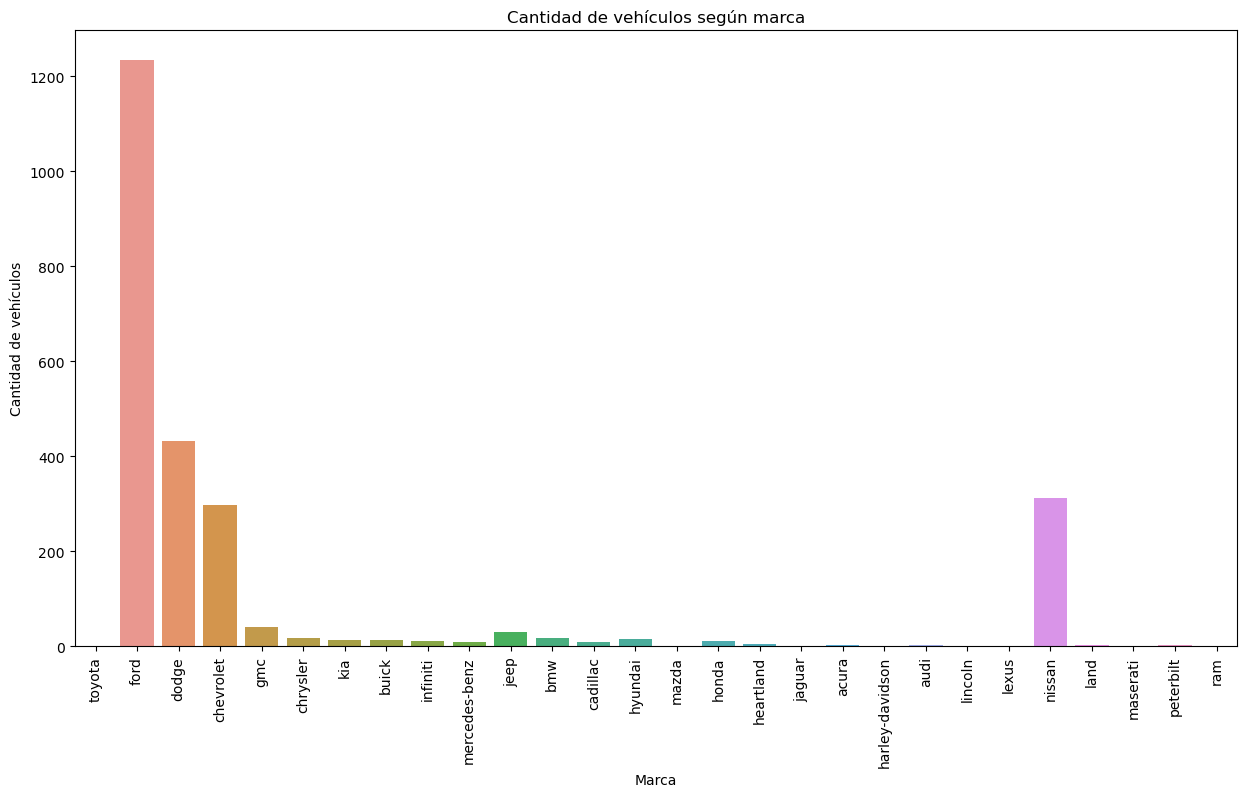

In [26]:
# VISUALIZAMOS GRÁFICAMENTE LA INFORMACIÓN ANTERIOR
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='brand')
plt.xlabel('Marca')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos según marca')
plt.show

---
## PARTE 2 - PREPROCESAMIENTO DE DATOS Y REDUCCIÓN DE DIMENSIONALIDAD
---

In [27]:
# ELIMINAMOS COLUMNAS IRRELEVANTES
df = df.drop(columns=['Unnamed: 0', 'title_status', 'color', 'vin', 'lot', 'country', 'condition'])
df.head()

,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida


---
## PARTE 3 - ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
---

---
## PARTE 4 - COMPARACIÓN FINAL DE MODELOS Y CONCLUSIÓN
---